In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Wrangled_data_cap2.csv',encoding='latin-1',
                   index_col='Index',parse_dates=True).iloc[:,1:]
data.head()

,Demand(MW),Forecast(MW),Temp,Name,holiday,DofWk,daylight
Index,,,,,,,
2015-07-01 00:00:00,5250.0,5587.0,68.0,NaN,0,3,0
2015-07-01 01:00:00,4847.0,5447.0,68.0,NaN,0,3,0
2015-07-01 02:00:00,4593.0,5220.0,66.9,NaN,0,3,0
2015-07-01 03:00:00,4473.0,4960.0,70.0,NaN,0,3,0
2015-07-01 04:00:00,4512.0,4727.0,69.1,NaN,0,3,0


In [4]:
# group features by day dataframe with Maximum value days displayed by feature
day1 = data.iloc[:,:2].groupby(pd.Grouper(freq='1D')).aggregate(np.sum)
weather = data[data['Temp']!=0].iloc[:,2:5].groupby(pd.Grouper(freq='1D')).aggregate(np.mean)
weekdays = data.iloc[:,5:6].groupby(pd.Grouper(freq='1D')).aggregate(np.max)
day1 = day1.merge(weather,right_index=True,left_index=True).merge(weekdays,
                 right_index=True,left_index=True).fillna(0)

for i in day1.iloc[:,:-2]:
    print('---------------\n','Max',i)
    print(day1[day1[i]== day1[i].max()])
    
print('\n-----------------Descriptive Statistics')
print(day1.describe().iloc[:,:-2])

---------------
 Max Demand(MW)
            Demand(MW)  Forecast(MW)     Temp  holiday  DofWk
Index                                                        
2017-09-01    130172.0      124533.0  86.3625        0      5
---------------
 Max Forecast(MW)
            Demand(MW)  Forecast(MW)     Temp  holiday  DofWk
Index                                                        
2017-09-01    130172.0      124533.0  86.3625        0      5
---------------
 Max Temp
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Index                                                          
2015-09-09    121425.0      101415.0  87.629167        0      3

-----------------Descriptive Statistics
          Demand(MW)   Forecast(MW)         Temp
count    1007.000000    1007.000000  1007.000000
mean    78880.389772   77875.169811    66.045446
std     11749.517922   11355.668950     7.508339
min     40941.000000   18095.000000    47.954167
25%     71210.000000   70714.500000    60.818750
50%     7

In [5]:
#restructure weekdays df to allow easy plotting
weekdays = pd.DataFrame(day1['Demand(MW)'].values,index=day1.DofWk,columns=['Demand(MW)'])
weekdays = weekdays[weekdays['Demand(MW)']!=0]
weekdays.index=weekdays.index.map(str)

In [6]:
#grouped by week dataframe with Maximum value days displayed by feature
day7 = data.iloc[:,:2].groupby(pd.Grouper(freq='7D')).aggregate(np.sum)
weather7 = data[data['Temp']!=0].iloc[:,2:4].groupby(pd.Grouper(freq='7D')).aggregate(np.mean)
holidays7 = data.iloc[:,4:5].groupby(pd.Grouper(freq='7D')).aggregate(np.max)
day7 = day7.merge(weather7,right_index=True,left_index=True).merge(holidays7,
                 right_index=True,left_index=True)

for i in day7.iloc[:,:-1]:
    print('---------------\n','Max',i)
    print(day7[day7[i]== day7[i].max()])
    
print('\n-----------------Descriptive Statistics')
print(day1.describe().iloc[:,:-2])

---------------
 Max Demand(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday
Index                                                   
2017-08-30    810047.0      807483.0  83.055655        1
---------------
 Max Forecast(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday
Index                                                   
2017-08-30    810047.0      807483.0  83.055655        1
---------------
 Max Temp
            Demand(MW)  Forecast(MW)       Temp  holiday
Index                                                   
2017-08-30    810047.0      807483.0  83.055655        1

-----------------Descriptive Statistics
          Demand(MW)   Forecast(MW)         Temp
count    1007.000000    1007.000000  1007.000000
mean    78880.389772   77875.169811    66.045446
std     11749.517922   11355.668950     7.508339
min     40941.000000   18095.000000    47.954167
25%     71210.000000   70714.500000    60.818750
50%     75091.000000   74808.000000    65.539583
75%     845

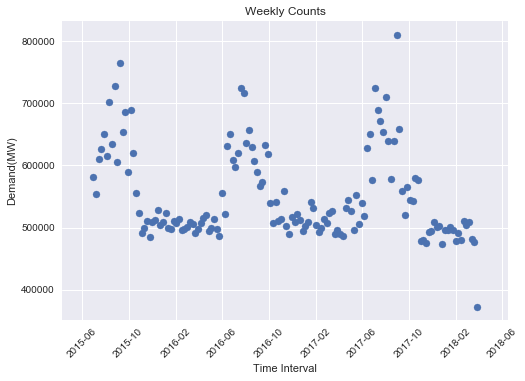

          Demand(MW)
count     144.000000
mean   551614.947917
std     73048.626404
min    372985.000000
25%    500001.250000
50%    520059.500000
75%    599445.250000
max    810047.000000


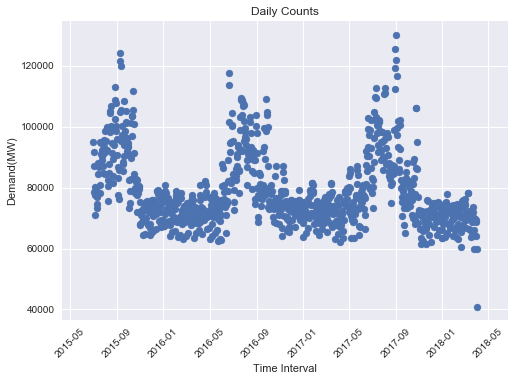

          Demand(MW)
count    1007.000000
mean    78880.389772
std     11749.517922
min     40941.000000
25%     71210.000000
50%     75091.000000
75%     84521.000000
max    130172.000000


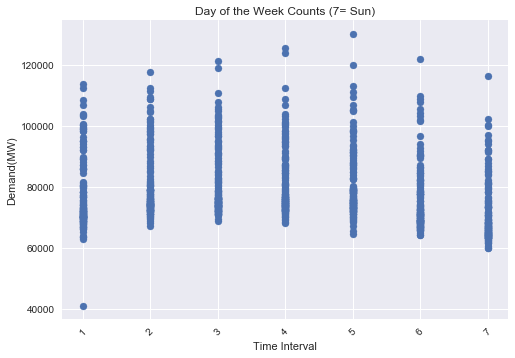

          Demand(MW)
count    1007.000000
mean    78880.389772
std     11749.517922
min     40941.000000
25%     71210.000000
50%     75091.000000
75%     84521.000000
max    130172.000000


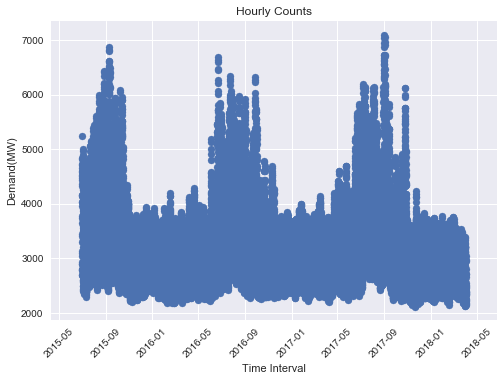

         Demand(MW)
count  24160.000000
mean    3287.771213
std      753.050049
min     2117.000000
25%     2731.000000
50%     3185.000000
75%     3590.000000
max     7095.000000


In [26]:
#Demand Over Time Visualization
titles= ['Weekly Counts','Daily Counts','Day of the Week Counts (7= Sun)',
         'Hourly Counts']

for i,t in zip([day7['Demand(MW)'],day1['Demand(MW)'],weekdays,data['Demand(MW)']],titles):
    try:
        i = i.to_frame('Demand(MW)')
        plt.scatter(i.index,i['Demand(MW)'])
        plt.xticks(rotation=45)
        plt.title(t)
        plt.ylabel('Demand(MW)')
        plt.xlabel('Time Interval')
        plt.show()
        print(i.describe())
    except:
        plt.scatter(i.index,i['Demand(MW)'])
        plt.xticks(rotation=45)
        plt.title(t)
        plt.ylabel('Demand(MW)')
        plt.xlabel('Time Interval')
        plt.show()
        print(i.describe())

The first chart above, 'Weekly Counts', displays the total Demand of each week over the 2+ year time span that the data covers. we can see that there is a clear cyclical pattern with Demand rising considerably in the Summer time.

The second chart displays total Demand of each day which illustrates the same pattern as the Weekly Connts but at a higher resolution. We can see that there are some outliers however the same general pattern is present with Demand being higher in Summer time.

Next we have Demand aggregated by Day of the Week and we can see that Demand is relatively even across the 7 days of the week. Sunday has the most outliers and Friday seems to have the highest Demand, but the concrentation of data is very similar across all days of the week.

Lastly, the final chart plots all hourly Demand data and shows us the same Summer time trend for Demand. It also reveals some missing Demand data which will be helpful for missing values analysis later on. With this we can say confidently that Demand rises in the Summer and falls in the Winter.

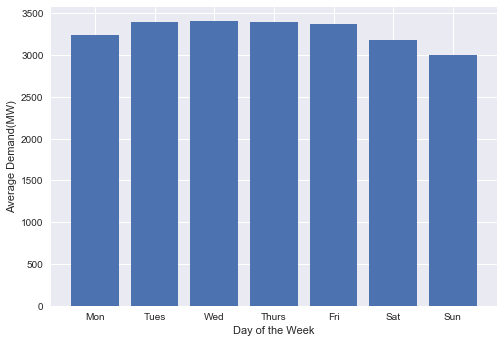

        Demand(MW)  Forecast(MW)       Temp
DofWk                                      
1      3245.373761   3213.703198  65.903334
2      3392.513258   3344.950175  65.973281
3      3409.646412   3354.755787  66.175810
4      3399.692998   3353.831308  66.380458
5      3376.014757   3339.912326  66.093818
6      3187.367188   3154.991030  65.943860
7      3004.419350   2981.687991  65.857776


In [33]:
#Mean Demand by Day of the Week
daycomp = data.groupby(by='DofWk').aggregate(np.mean)
plt.bar(daycomp.index,daycomp['Demand(MW)'],tick_label=['Mon', 'Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.ylabel('Average Demand(MW)')
plt.xlabel('Day of the Week')
plt.show()
print(daycomp.iloc[:,:-2])

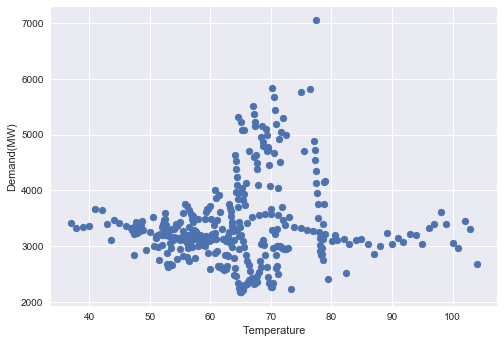

Pearsons R = 0.100577796579


In [42]:
#Mean Demand by Temperature
meantemp = data.iloc[:,:3].groupby(by='Temp').aggregate(np.mean)

plt.scatter(meantemp.index,meantemp['Demand(MW)'])
plt.xlabel('Temperature')
plt.ylabel('Demand(MW)')
plt.show()
print('Pearsons R =',np.corrcoef(meantemp.index,meantemp['Demand(MW)'])[1,0])

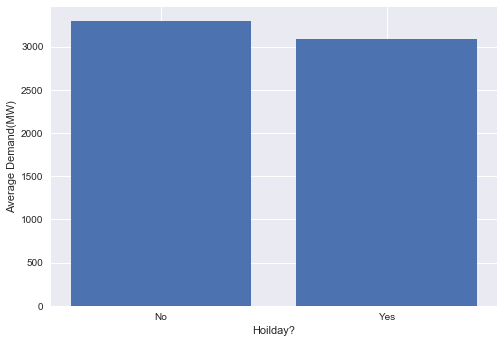

          Demand(MW)  Forecast(MW)       Temp
holiday                                      
0        3294.671238   3255.450885  66.120935
1        3084.185606   3066.042929  63.866351


In [56]:
#holiday comparison
holidaycomp = data.groupby(by='holiday').aggregate(np.mean)
plt.bar(holidaycomp.index,holidaycomp['Demand(MW)'],tick_label=['No','Yes'])
plt.ylabel('Average Demand(MW)')
plt.xlabel('Hoilday?')
plt.show()
print(holidaycomp.iloc[:,:-2])

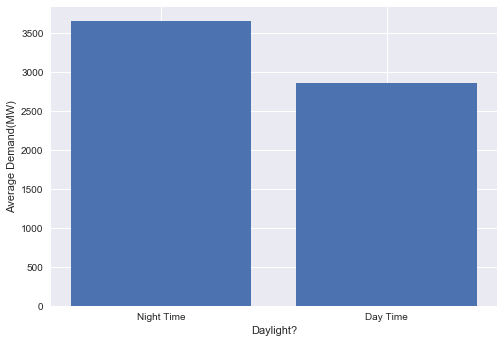

           Demand(MW)  Forecast(MW)       Temp
daylight                                      
0         3658.375702   3634.783529  61.584783
1         2859.000248   2803.293539  71.209619


In [57]:
#Demand by Daylight
lightcomp = data.groupby(by='daylight').aggregate(np.mean)
plt.bar(lightcomp.index,lightcomp['Demand(MW)'],tick_label=['Night Time','Day Time'])
plt.ylabel('Average Demand(MW)')
plt.xlabel('Daylight?')
plt.show()
print(lightcomp.iloc[:,:-2])

Above we have hourly Demand plotted based on Daylight with the area between the horizontal lines indicating over lap. Both plots display the same data but with a different time of day on top to show the considerable overlap in hourly Demand. 
As we might have imagined, Demand is consistantly higher in at night, however there are some day time points that rival the night time Demand closely.

In [3]:
#Impute Missing values for Demand and Temperature Data using Linear Interpolation
data.info()
print('-------------------------Initial Dataframe info')
for i in ['Demand(MW)','Temp']:
    data[i] = data[i].replace(to_replace = 0,value=np.NaN)
    missing = data[data[i].isnull()==True]
    data[i] = data[i].interpolate()
    filled = data.loc[missing.index]
    print(filled.head())
    print('-------------------------Imputed Data Sample')
data.info()
print('-------------------------Missing Data Imputed Dataframe info')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24160 entries, 2015-07-01 00:00:00 to 2018-04-02 15:00:00
Data columns (total 7 columns):
Demand(MW)      24128 non-null float64
Forecast(MW)    24135 non-null float64
Temp            24160 non-null float64
Name            1459 non-null object
holiday         24160 non-null int64
DofWk           24160 non-null int64
daylight        24160 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ MB
-------------------------Initial Dataframe info
                      Demand(MW)  Forecast(MW)  Temp Name  holiday  DofWk  \
Index                                                                       
2016-04-25 22:00:00  3262.000000        3416.0  57.0  NaN        0      1   
2016-04-25 23:00:00  3261.000000        3426.0  57.0  NaN        0      1   
2016-05-24 18:00:00  3325.500000        3271.0  64.0  NaN        0      2   
2018-03-11 00:00:00  3239.757576        2585.0  57.0  NaN        0      7   
2018-03-11 01:00:00 

In [3]:
#---------------create lag features
lags = []
for j in range(30):
    time = []
    daylag = []
    interval = j+1
    for i in data.index[24*interval:]:
        dayago = i-np.timedelta64(1*interval,'D')
        daydemand = data.loc[dayago,'Demand(MW)']
        time.append(i)
        daylag.append(daydemand)
    lagdf = pd.DataFrame(daylag,index=time,columns=['dayLag%s'%interval])
    lags.append(lagdf)

In [4]:
#Merge lag features into original Data
lagdata = data
for i in lags:
    lagdata = lagdata.merge(i,right_index=True,left_index=True,how='outer')
lagdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24160 entries, 2015-07-01 00:00:00 to 2018-04-02 15:00:00
Data columns (total 37 columns):
Demand(MW)      24128 non-null float64
Forecast(MW)    24135 non-null float64
Temp            24160 non-null float64
Name            1459 non-null object
holiday         24160 non-null int64
DofWk           24160 non-null int64
daylight        24160 non-null int64
dayLag1         24104 non-null float64
dayLag2         24080 non-null float64
dayLag3         24056 non-null float64
dayLag4         24032 non-null float64
dayLag5         24008 non-null float64
dayLag6         23984 non-null float64
dayLag7         23960 non-null float64
dayLag8         23936 non-null float64
dayLag9         23912 non-null float64
dayLag10        23888 non-null float64
dayLag11        23864 non-null float64
dayLag12        23840 non-null float64
dayLag13        23816 non-null float64
dayLag14        23792 non-null float64
dayLag15        23768 non-null float64
dayLag

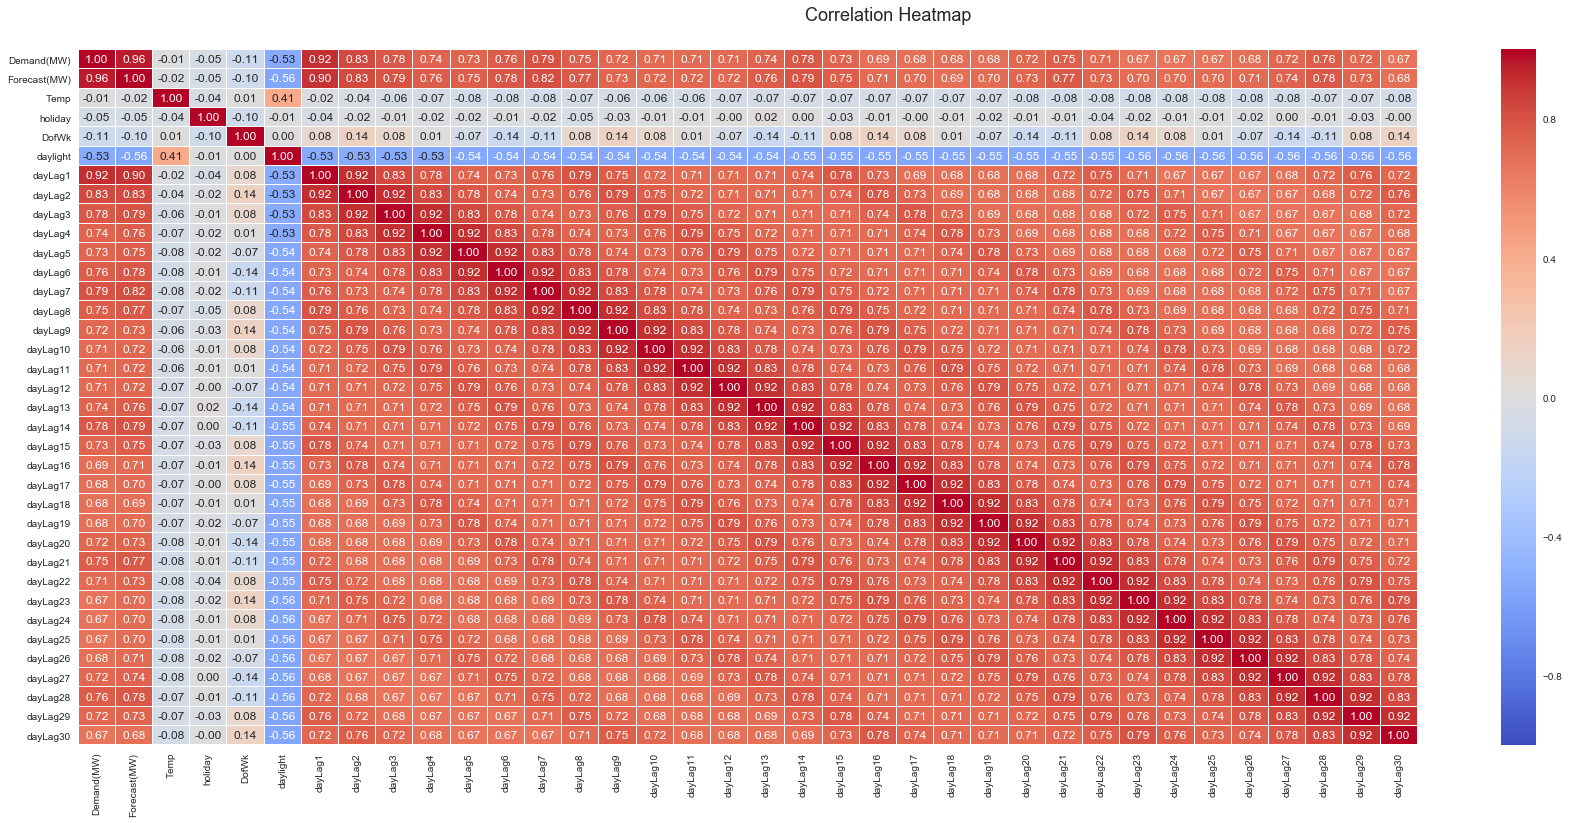

In [18]:
corr = lagdata.corr()
f, ax = plt.subplots(figsize=(30, 12))
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.01)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=18)
plt.show()